In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import dask.dataframe as dd
plt.rcParams.update({'figure.figsize': (16, 7), 'figure.dpi': 120})

In [2]:
df = pd.read_csv('D:\dataset\id_205_1thang.csv', parse_dates=['DATA_AS_OF'], index_col='DATA_AS_OF')

df.head()

,SPEED
DATA_AS_OF,
2021-08-13 00:03:00,55.92
2021-08-13 00:08:00,55.92
2021-08-13 00:13:00,59.65
2021-08-13 00:18:00,60.89
2021-08-13 00:23:00,61.51


In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.SPEED.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.327291
p-value: 0.000000


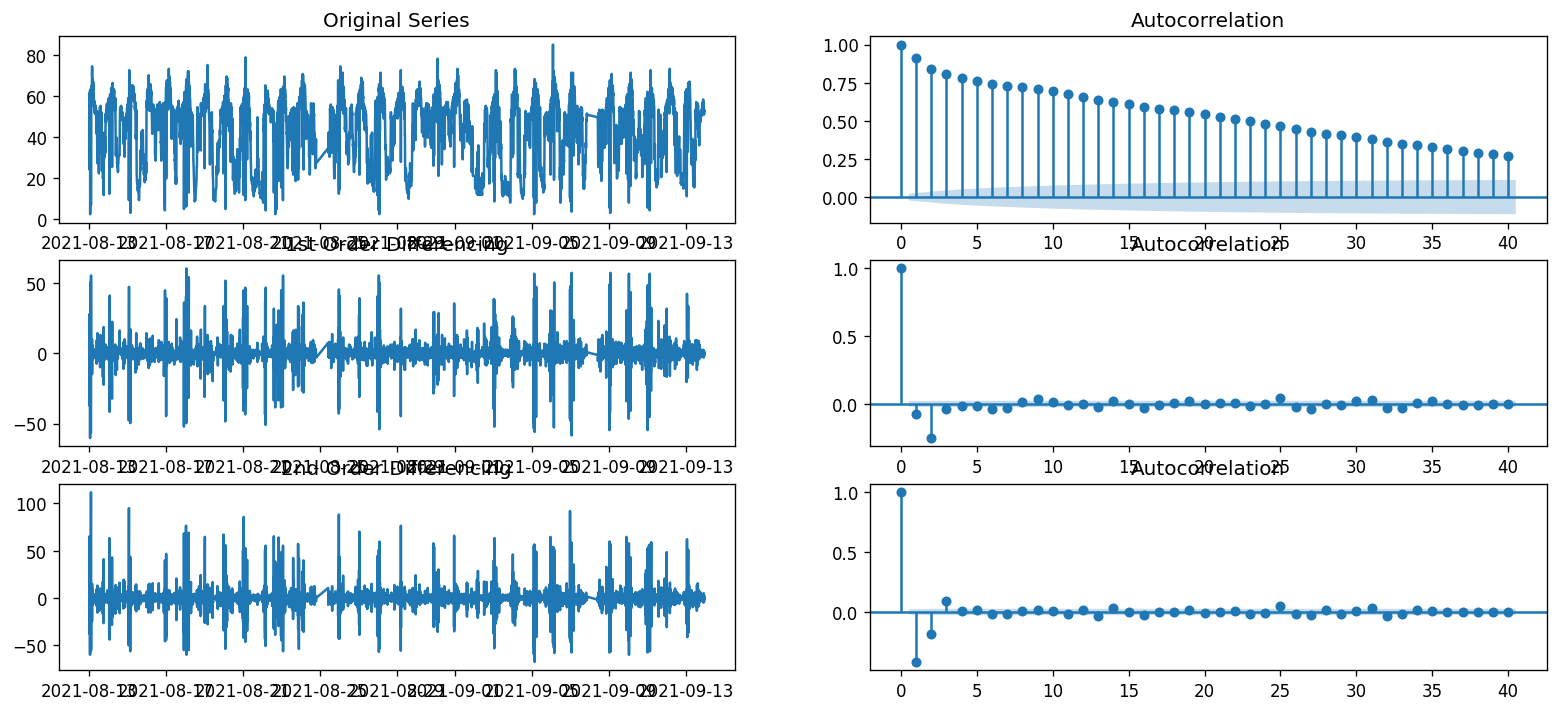

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(16,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df.SPEED); axes[0, 0].set_title('Original Series')
plot_acf(df.SPEED, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.SPEED.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.SPEED.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.SPEED.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.SPEED.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

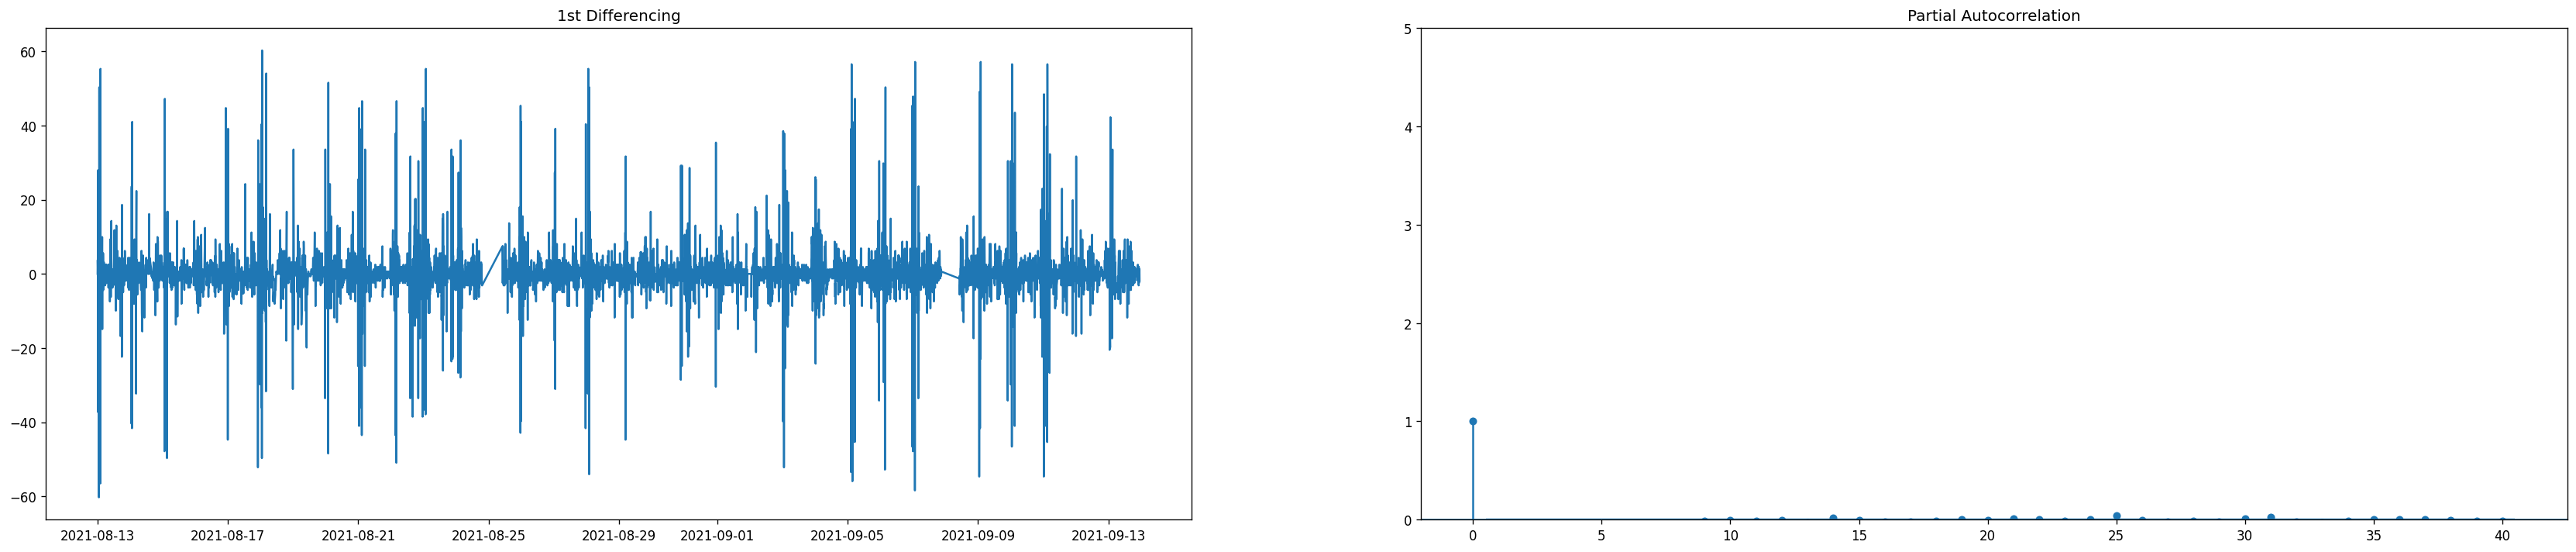

In [5]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(35,7), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df.SPEED.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.SPEED.diff().dropna(), ax=axes[1])

plt.show()

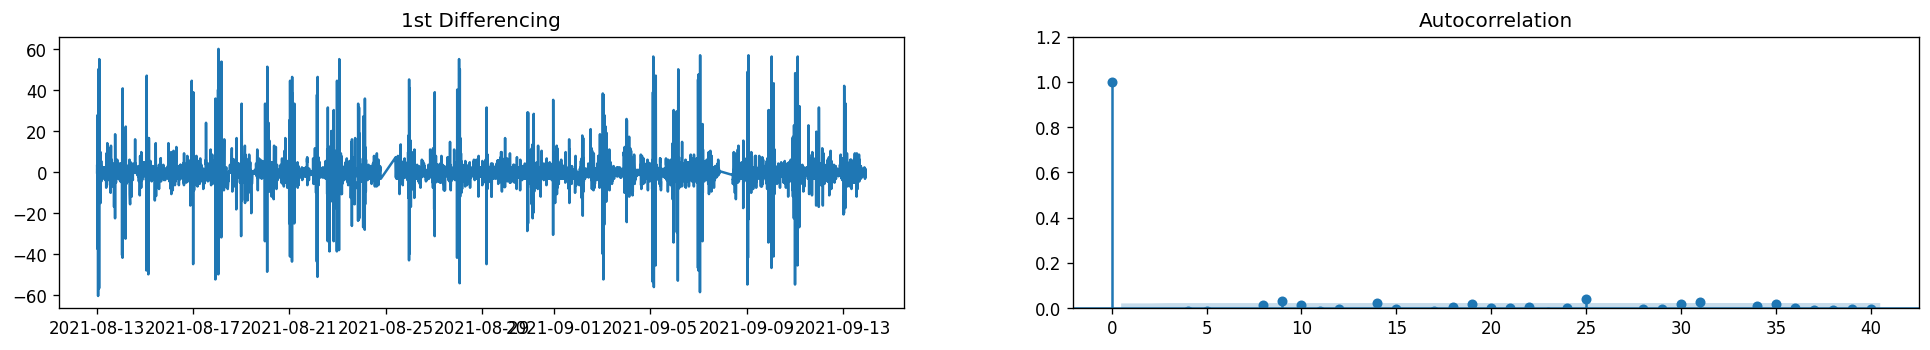

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(20,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.SPEED.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.SPEED.diff().dropna(), ax=axes[1])

plt.show()

In [7]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.SPEED, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided

                             ARIMA Model Results                              
Dep. Variable:                D.SPEED   No. Observations:                 8083
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26188.567
Method:                       css-mle   S.D. of innovations              6.178
Date:                Thu, 04 Nov 2021   AIC                          52387.134
Time:                        17:22:00   BIC                          52422.121
Sample:                             1   HQIC                         52399.103
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.031     -0.011      0.991      -0.061       0.060
ar.L1.D.SPEED     0.2620      0.034      7.632      0.000       0.195       0.329
ma.L1.D.SPEED    -0.4029      0.034    -

In [8]:
model = ARIMA(df.SPEED, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided

                             ARIMA Model Results                              
Dep. Variable:                D.SPEED   No. Observations:                 8083
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26291.985
Method:                       css-mle   S.D. of innovations              6.258
Date:                Thu, 04 Nov 2021   AIC                          52591.971
Time:                        17:22:02   BIC                          52619.961
Sample:                             1   HQIC                         52601.546
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.028     -0.005      0.996      -0.054       0.054
ar.L1.D.SPEED     0.6201      0.017     37.216      0.000       0.587       0.653
ma.L1.D.SPEED    -0.8488      0.011    -

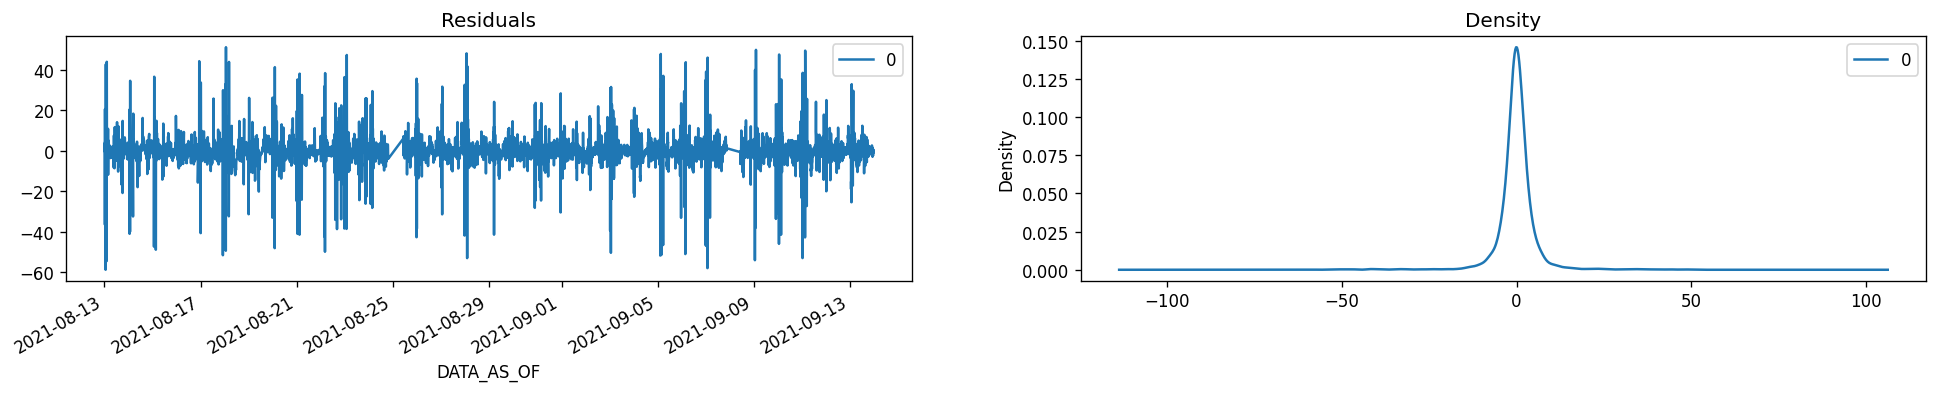

In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

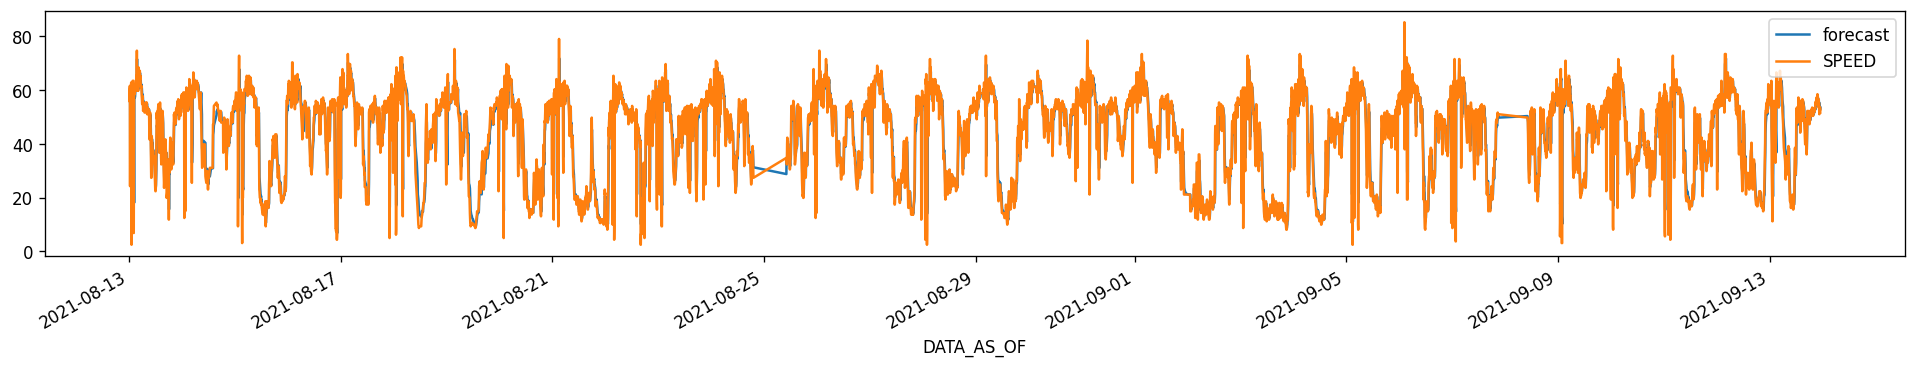

In [10]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [11]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.SPEED[1587:]
test = df.SPEED[0:1587]

C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided

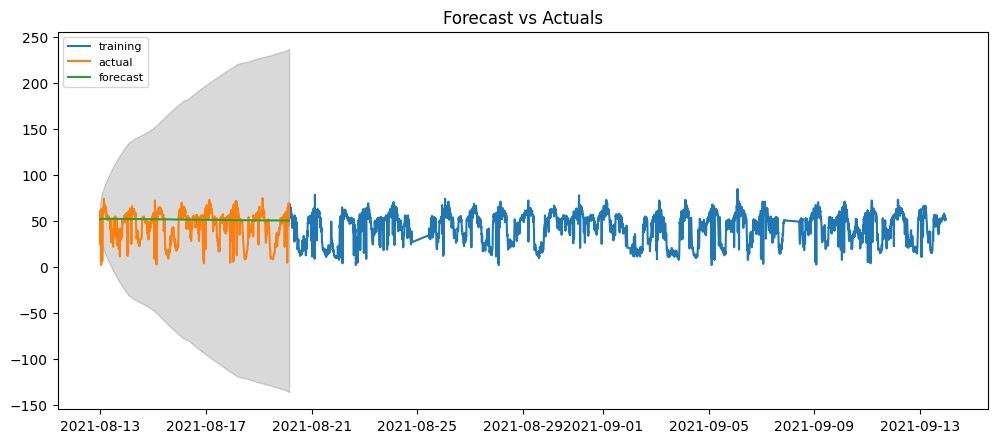

In [12]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1587, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [13]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

C:\Users\hoang\AppData\Local\Temp/ipykernel_12516/201981224.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\hoang\AppData\Local\Temp/ipykernel_12516/201981224.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\hoang\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default a

{'mape': 0.5440075578682138,
 'me': 6.0035519460166435,
 'mae': 11.735841300249986,
 'mpe': 0.4488069267605263,
 'rmse': 16.337446137772798,
 'acf1': 0.8801343401742371,
 'corr': 0.022843073960993023,
 'minmax': 0.21865370107693483}

In [ ]:
import pmdarima as pm
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=43.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=64223.720, Time=0.34 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=55611.220, Time=5.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=58122.053, Time=5.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=64221.720, Time=0.25 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=57671.466, Time=0.84 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=54803.336, Time=24.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=73.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=28.44 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=63667.986, Time=14.84 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=54805.326, Time=34.22 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=54805.316, Time=31.18 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=58247.060, Time=20.68 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=54708.080, Time=49.64 sec
 ARIMA(2,0,1)(

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of SPEED - Time Series Dataset")
plt.show()

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(df['SPEED'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = df.index.month
df = pd.merge(df, seasonal_index, how='left', on='month')
df.columns = ['SPEED', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

In [ ]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df.index, exogenous=df.seasonal_index,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()